In [1]:
import torch

layer3 = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer3_pythia-70m.pt") 
layer4 = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer4_pythia-70m.pt")
layer5 = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer5_pythia-70m.pt")
logits = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer3_pythia-70m.pt")
random_layer3 = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer3_pythia-70m_random.pt")
random_layer4 = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer4_pythia-70m_random.pt")
random_layer5 = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer5_pythia-70m_random.pt")
random_logits = torch.load("../weights/linearity/lss/linearity_steer_layer2_measure_Layer3_pythia-70m_random.pt")


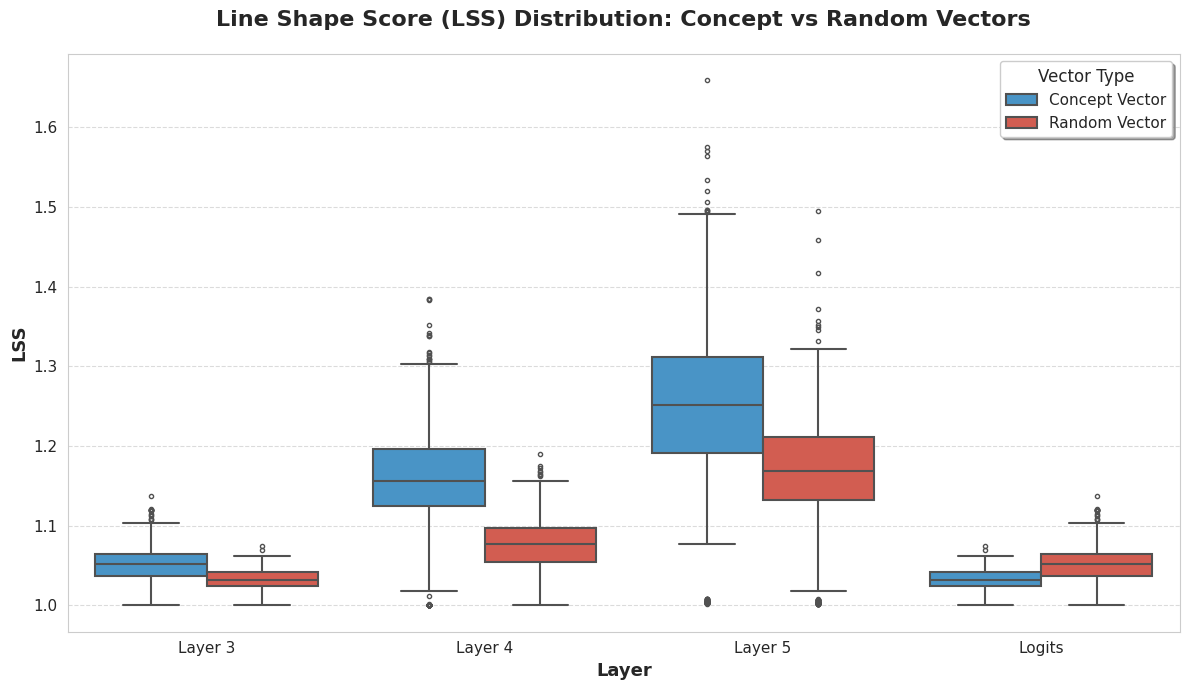

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for boxplot with separate categories for concept and random
data = []
for layer_data, layer_name, vector_type in [
    (layer3, 'Layer 3', 'Concept Vector'), 
    (layer4, 'Layer 4', 'Concept Vector'), 
    (layer5, 'Layer 5', 'Concept Vector'), 
    (random_logits, 'Logits', 'Concept Vector'),
    (random_layer3, 'Layer 3', 'Random Vector'), 
    (random_layer4, 'Layer 4', 'Random Vector'), 
    (random_layer5, 'Layer 5', 'Random Vector'), 
    (logits, 'Logits', 'Random Vector')
]:
    for value in layer_data:
        data.append({'Layer': layer_name, 'LSS': value, 'Vector Type': vector_type})

df = pd.DataFrame(data)

# Set style and color palette
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Create boxplot with hue for vector type
ax = sns.boxplot(
    data=df, 
    x='Layer', 
    y='LSS', 
    hue='Vector Type',
    palette={'Concept Vector': '#3498db', 'Random Vector': '#e74c3c'},
    linewidth=1.5,
    fliersize=3
)

# Customize the plot
plt.title('Line Shape Score (LSS) Distribution: Concept vs Random Vectors', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('LSS', fontsize=13, fontweight='bold')
plt.xlabel('Layer', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Customize legend
plt.legend(title='Vector Type', title_fontsize=12, fontsize=11, 
           loc='upper right', frameon=True, shadow=True)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('lss_distribution.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
path = "../assets/language_translation/en-fr.jsonl"

import json

with open(path, "r") as f:
    data = [json.loads(line) for line in f]




{'lang0': 'en', 'lang1': 'fr', 'word0': 'off', 'word1': 'Ils', 'contexts0': ['The average life span of an adult C. macellaria is 2–6 weeks. In this time period, the females try to increase the chances of producing as many surviving off', 'Cochliomyia macellaria larvae will feed on the decaying flesh of the animal that they have been laid on until they reach maturity. This stage of maturity is during the third instar and by this time point, the larvae may be as long as 17\xa0mm. The entire larval stage is about four to seven days long, and afterwards, the larvae fall off', 'As adults, the food specifications of the flies change. Female flies will continue to feed on tissues of animals; however, now they preferentially feed off', 'While there are theories for protective coloration, there is no clear mimicry done by C. macellaria or by other insects specifically mimicking C. macellaria. The metallic green coloration may be a form of warding off', "Doctor Victor's debut album, 1st Prescrip

In [ ]:
en_file = "../assets/language_translation/en.jsonl"
fr_file = "../assets/language_translation/fr.jsonl"

import json

with open(en_file, "w") as f:
    for line in data:
        f.write(json.dumps(line["contexts0"]) + "\n")

with open(fr_file, "w") as f:
    for line in data:
        f.write(json.dumps(line["contexts1"]) + "\n")

